In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [6]:
df.dropna(axis=0, how='all', thresh=None, inplace=True)

In [7]:
df.drop(['body','boat','home.dest','cabin'],'columns',inplace=True)

In [8]:
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [9]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['age']=df['age'].apply(np.ceil)
df['age']=df['age'].apply(np.int)

In [10]:
df['pclass'].fillna(df['pclass'].mode()[0],inplace=True)
df['pclass']=df['pclass'].apply(np.int)

In [11]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [12]:
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [13]:
df['sibsp']=df['sibsp'].apply(np.int)

In [14]:
df['parch']=df['parch'].apply(np.int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   int64  
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


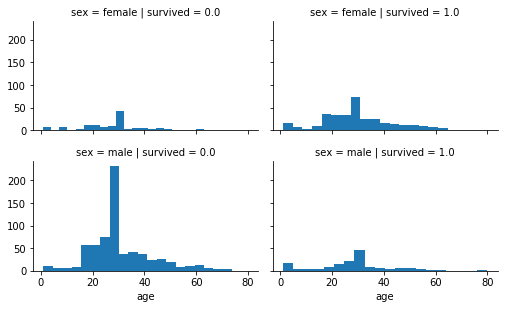

In [16]:
grid = sns.FacetGrid(df,col='survived', 
    row='sex', height=2.2, aspect=1.6)
grid.map(plt.hist,'age', bins=20)
grid.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


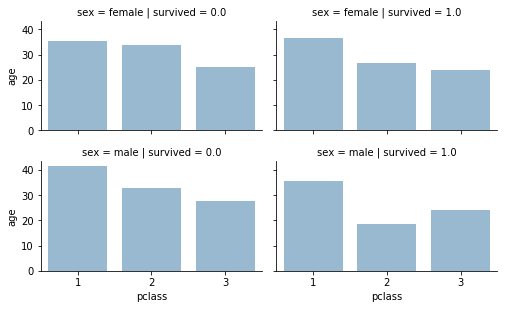

In [17]:
grid=sns.FacetGrid(df,row ='sex' , col = 'survived' , height =2.2 ,  aspect= 1.6)
grid.map(sns.barplot, 'pclass' ,'age', alpha = .5, ci = None)
grid.add_legend()

In [18]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

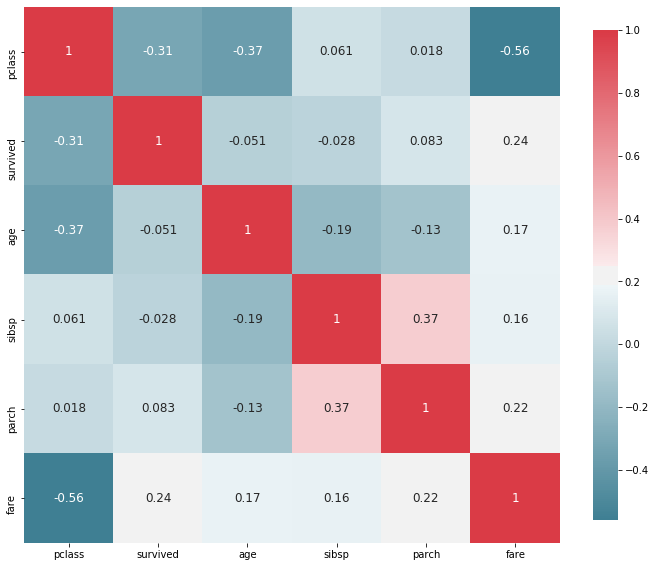

In [19]:
plot_correlation_map( df )

In [20]:
title=[]
df1=''
for data in df['name']:
    df1=data.split(',')
    df1=df1[1].split('.')
    title.append(str(df1[0]))
df['title']=title 
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,Miss
1,1,1.0,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S,Master
2,1,0.0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,Miss
3,1,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,Mr
4,1,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,Mrs


In [21]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master",
                    }

In [22]:
df['title'].replace(Title_Dictionary, inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,Miss
1,1,1.0,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S,Master
2,1,0.0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,Miss
3,1,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,Mr
4,1,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,Mrs


In [23]:
df['title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Ms                2
 Mlle              2
 Lady              1
 Don               1
 Mme               1
 Capt              1
 Jonkheer          1
 the Countess      1
 Dona              1
 Sir               1
Name: title, dtype: int64

In [24]:
df['familysize'] = df['sibsp'] + df['parch']
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,1,1.0,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,S,Miss,0
1,1,1.0,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,S,Master,3
2,1,0.0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,Miss,3
3,1,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,S,Mr,3
4,1,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,Mrs,3


# Logistic regression

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   float64
 2   name        1309 non-null   int32  
 3   sex         1309 non-null   int64  
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   embarked    1309 non-null   object 
 10  title       1309 non-null   object 
 11  familysize  1309 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 127.8+ KB


In [41]:
encoder = LabelEncoder()
df['name']=encoder.fit_transform(df['name'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,1,1.0,21,1,29,0,0,24160,211.3375,S,Miss,0
1,1,1.0,23,0,1,1,2,113781,151.5500,S,Master,3
2,1,0.0,24,1,2,1,2,113781,151.5500,S,Miss,3
3,1,0.0,25,0,30,1,2,113781,151.5500,S,Mr,3
4,1,0.0,26,1,25,1,2,113781,151.5500,S,Mrs,3


In [25]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['sex'].value_counts()

0    843
1    466
Name: sex, dtype: int64

In [47]:
df['ticket']=encoder.fit_transform(df['ticket'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,1,1.0,21,1,29,0,0,187,211.3375,S,Miss,0
1,1,1.0,23,0,1,1,2,49,151.5500,S,Master,3
2,1,0.0,24,1,2,1,2,49,151.5500,S,Miss,3
3,1,0.0,25,0,30,1,2,49,151.5500,S,Mr,3
4,1,0.0,26,1,25,1,2,49,151.5500,S,Mrs,3


In [49]:
df['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [50]:
df['embarked']=df['embarked'].map({'S':1,'C':2,'Q':3})
df['embarked'].value_counts()

1    916
2    270
3    123
Name: embarked, dtype: int64

In [51]:
df['title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Ms                2
 Mlle              2
 Lady              1
 Don               1
 Mme               1
 Capt              1
 Jonkheer          1
 the Countess      1
 Dona              1
 Sir               1
Name: title, dtype: int64

In [52]:
df['title']=encoder.fit_transform(df['title'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,1,1.0,21,1,29,0,0,187,211.3375,1,9,0
1,1,1.0,23,0,1,1,2,49,151.5500,1,8,3
2,1,0.0,24,1,2,1,2,49,151.5500,1,9,3
3,1,0.0,25,0,30,1,2,49,151.5500,1,12,3
4,1,0.0,26,1,25,1,2,49,151.5500,1,13,3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   float64
 2   name        1309 non-null   int32  
 3   sex         1309 non-null   int64  
 4   age         1309 non-null   int64  
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   int32  
 8   fare        1309 non-null   float64
 9   embarked    1309 non-null   int64  
 10  title       1309 non-null   int32  
 11  familysize  1309 non-null   int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 117.6 KB


In [58]:
#features extraction
x=df[['sex','age','sibsp','pclass']]
y=df['survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) #splitting data with test size of 20%

model = LogisticRegression()   #build our logistic model
model.fit(x_train, y_train)  #fitting training data
predicted  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.77


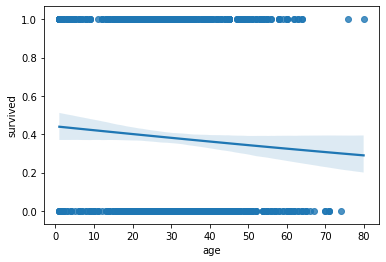

In [27]:
sns.regplot(x='age',y='survived',data=df,logistic=True)

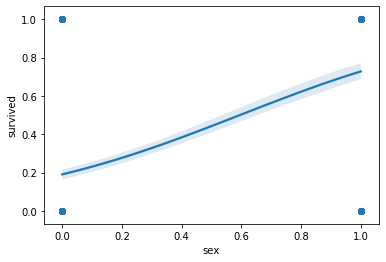

In [28]:
sns.regplot(x='sex',y='survived',data=df,logistic=True)

In [68]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0        127   17
1.0         44   74


### Conclusion
True positive : 127 // True negative : 74 // False positive : 17 // False negative : 44

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81       144
         1.0       0.81      0.63      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.77      0.77      0.76       262



## ROC & AUC

In [69]:
#generate two class dataset
x, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

#splitting data with test size of 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [75]:
log_model = LogisticRegression() #logistic regression model
knn_model = KNeighborsClassifier(n_neighbors=4) #knn model

#fit model
log_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

#predict probabilities

pred_prob_log = log_model.predict_proba(x_test)
pred_prob_knn = knn_model.predict_proba(x_test)

In [78]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)

#roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [79]:
# auc scores

auc_score_log = roc_auc_score(y_test, pred_prob_log[:,1])
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])

print('Logistic AUC score :',auc_score_log)
print('KNN AUC score :',auc_score_knn)

Logistic AUC score : 0.8519303201506592
KNN AUC score : 0.7338747645951037


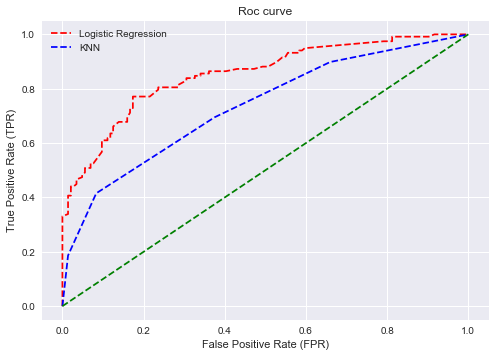

In [82]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--',color='green')
#title
plt.title('Roc curve')
# x label
plt.xlabel('False Positive Rate (FPR)')
# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

The green line in the middle represents a purely random classifier and therefore our classifier should be as far away from it as possible. Our logistic regression model seems to do a good job.